In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
arashnic_taxi_pricing_with_mobility_analytics_path = kagglehub.dataset_download('arashnic/taxi-pricing-with-mobility-analytics')

print('Data source import complete.')


# Installing Dependencies

In [5]:
!pip install lightgbm
!pip install xgboost

# Importing Libraries

In [6]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Importing the Dataset

In [7]:
train = pd.read_csv(r'D:\polytron jaya\Coding\taxi-pricing-analysis\Dataset\sigma_cabs.csv')
train.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [8]:
train.describe()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
count,131662.000000,125742.000000,111469.000000,131662.000000,131662.000000,60632.000000,131662.000000,131662.000000,131662.000000
mean,44.200909,6.016661,2.802064,2.849458,0.782838,64.202698,51.202800,75.099019,2.155747
std,25.522882,3.626887,0.225796,0.980675,1.037559,21.820447,4.986142,11.578278,0.738164
min,0.310000,0.000000,1.596380,0.001250,0.000000,30.000000,40.000000,52.000000,1.000000
25%,24.580000,3.000000,2.654730,2.152500,0.000000,46.000000,48.000000,67.000000,2.000000
50%,38.200000,6.000000,2.798050,2.895000,0.000000,61.000000,50.000000,74.000000,2.000000
75%,60.730000,10.000000,2.946780,3.582500,1.000000,80.000000,54.000000,82.000000,3.000000
max,109.230000,10.000000,4.875110,5.000000,8.000000,210.000000,124.000000,206.000000,3.000000


In [9]:
train.shape

(131662, 14)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      131662 non-null  object 
 1   Trip_Distance                131662 non-null  float64
 2   Type_of_Cab                  111452 non-null  object 
 3   Customer_Since_Months        125742 non-null  float64
 4   Life_Style_Index             111469 non-null  float64
 5   Confidence_Life_Style_Index  111469 non-null  object 
 6   Destination_Type             131662 non-null  object 
 7   Customer_Rating              131662 non-null  float64
 8   Cancellation_Last_1Month     131662 non-null  int64  
 9   Var1                         60632 non-null   float64
 10  Var2                         131662 non-null  int64  
 11  Var3                         131662 non-null  int64  
 12  Gender                       131662 non-null  object 
 13 

In [11]:
train.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

# Data Preprocessing

In [12]:
train.replace(r'^\s*$', np.nan, regex=True)

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131657,T0005908509,11.72,D,1.0,2.74229,A,A,3.28500,0,61.0,47,76,Male,3
131658,T0005908510,74.81,C,7.0,2.81059,C,A,0.44500,0,NaN,63,88,Male,2
131659,T0005908512,40.17,C,10.0,2.99565,B,A,3.33625,0,NaN,48,75,Female,2
131660,T0005908513,46.88,B,4.0,3.04744,A,B,4.15750,1,47.0,54,79,Male,2


# Null Values

##### Since the Type_of_cab have empty columns we will replace them by the mode of the Type_of_cab column.

##### Since the Customer_Since_Months have empty columns we will replace them by the mean of the Customer_Since_Months column.

##### Since the Life_Style_Index have empty columns we will replace them by the mean of the Life_Style_Index column.

##### Since the Confidence_Life_Style_Index have empty columns we will replace them by the mean of the Confidence_Life_Style_Index column.

##### Since the Var1 have empty columns we will replace them by the mean of the Var1 column.

In [13]:
train['Type_of_Cab'] = train['Type_of_Cab'].fillna(train['Type_of_Cab'].mode()[0])

train['Customer_Since_Months'] = train['Customer_Since_Months'].fillna(train['Customer_Since_Months'].mean())

train['Life_Style_Index'] = train['Life_Style_Index'].fillna(train['Life_Style_Index'].mean())

train['Confidence_Life_Style_Index'] = train['Confidence_Life_Style_Index'].fillna(train['Confidence_Life_Style_Index'].mode()[0])

train['Var1'] = train['Var1'].fillna(train['Var1'].mean())

In [14]:
train.isnull().sum()

Trip_ID                        0
Trip_Distance                  0
Type_of_Cab                    0
Customer_Since_Months          0
Life_Style_Index               0
Confidence_Life_Style_Index    0
Destination_Type               0
Customer_Rating                0
Cancellation_Last_1Month       0
Var1                           0
Var2                           0
Var3                           0
Gender                         0
Surge_Pricing_Type             0
dtype: int64

In [15]:
train = train.drop(['Trip_ID'], axis = 1)

In [16]:
train.Destination_Type.unique()

array(['A', 'E', 'B', 'C', 'G', 'D', 'F', 'K', 'L', 'H', 'I', 'J', 'M',
       'N'], dtype=object)

## Converting Categorical values to Numerical values

In [17]:
cleanup_nums = {"Type_of_Cab": {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5},
                "Confidence_Life_Style_Index": {"A": 1, "B": 2, "C": 3},
                "Destination_Type": {'A': 1, 'E': 5, 'B': 2, 'C': 3, 'G': 7, 'D': 4, 'F': 6, 'K': 11, 'L': 12, 'H': 8, 'I': 9, 'J': 10, 'M': 13,'N': 14},
                "Gender" :{'Male': 1, "Female": 2}}

In [18]:
train = train.replace(cleanup_nums)

C:\Users\xabouo\AppData\Local\Temp\ipykernel_27080\3194787199.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train = train.replace(cleanup_nums)


In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_Distance                131662 non-null  float64
 1   Type_of_Cab                  131662 non-null  int64  
 2   Customer_Since_Months        131662 non-null  float64
 3   Life_Style_Index             131662 non-null  float64
 4   Confidence_Life_Style_Index  131662 non-null  int64  
 5   Destination_Type             131662 non-null  int64  
 6   Customer_Rating              131662 non-null  float64
 7   Cancellation_Last_1Month     131662 non-null  int64  
 8   Var1                         131662 non-null  float64
 9   Var2                         131662 non-null  int64  
 10  Var3                         131662 non-null  int64  
 11  Gender                       131662 non-null  int64  
 12  Surge_Pricing_Type           131662 non-null  int64  
dtyp

In [20]:
train.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,6.77,2,1.0,2.427690,1,1,3.90500,0,40.000000,46,60,2,2
1,29.47,2,10.0,2.782450,2,1,3.45000,0,38.000000,56,78,1,2
2,41.58,2,10.0,2.802064,2,5,3.50125,2,64.202698,56,77,1,2
3,61.56,3,10.0,2.802064,2,1,3.45375,0,64.202698,52,74,1,3
4,54.95,3,10.0,3.034530,2,1,3.40250,4,51.000000,49,102,1,2


In [21]:
# import seaborn as sns
# sns.pairplot(data =train, hue = 'Surge_Pricing_Type')
# plt.show()

# Visualizing Data

<Axes: >

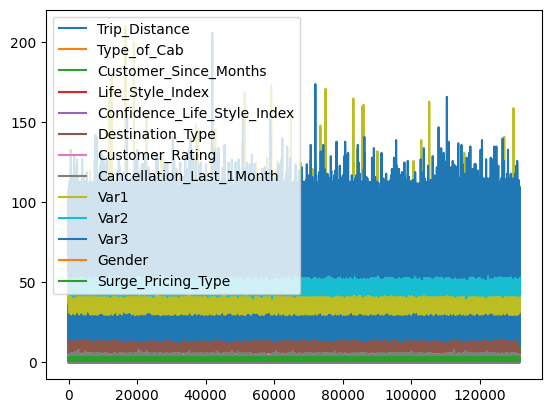

In [22]:
train.plot()

<Axes: xlabel='Surge_Pricing_Type'>

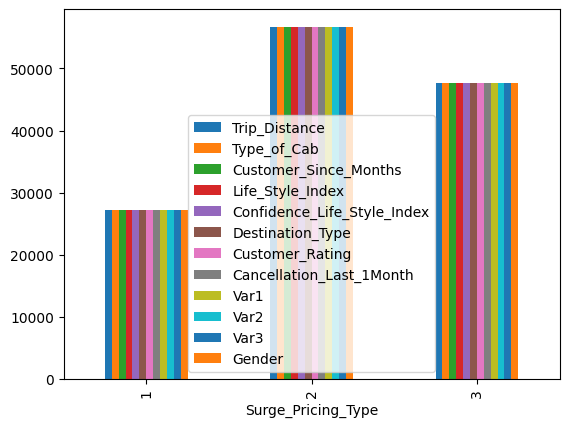

In [23]:
train.groupby('Surge_Pricing_Type').count().plot(kind='bar')

# Histogram

array([[<Axes: title={'center': 'Trip_Distance'}>,
        <Axes: title={'center': 'Type_of_Cab'}>,
        <Axes: title={'center': 'Customer_Since_Months'}>,
        <Axes: title={'center': 'Life_Style_Index'}>],
       [<Axes: title={'center': 'Confidence_Life_Style_Index'}>,
        <Axes: title={'center': 'Destination_Type'}>,
        <Axes: title={'center': 'Customer_Rating'}>,
        <Axes: title={'center': 'Cancellation_Last_1Month'}>],
       [<Axes: title={'center': 'Var1'}>,
        <Axes: title={'center': 'Var2'}>,
        <Axes: title={'center': 'Var3'}>,
        <Axes: title={'center': 'Gender'}>],
       [<Axes: title={'center': 'Surge_Pricing_Type'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

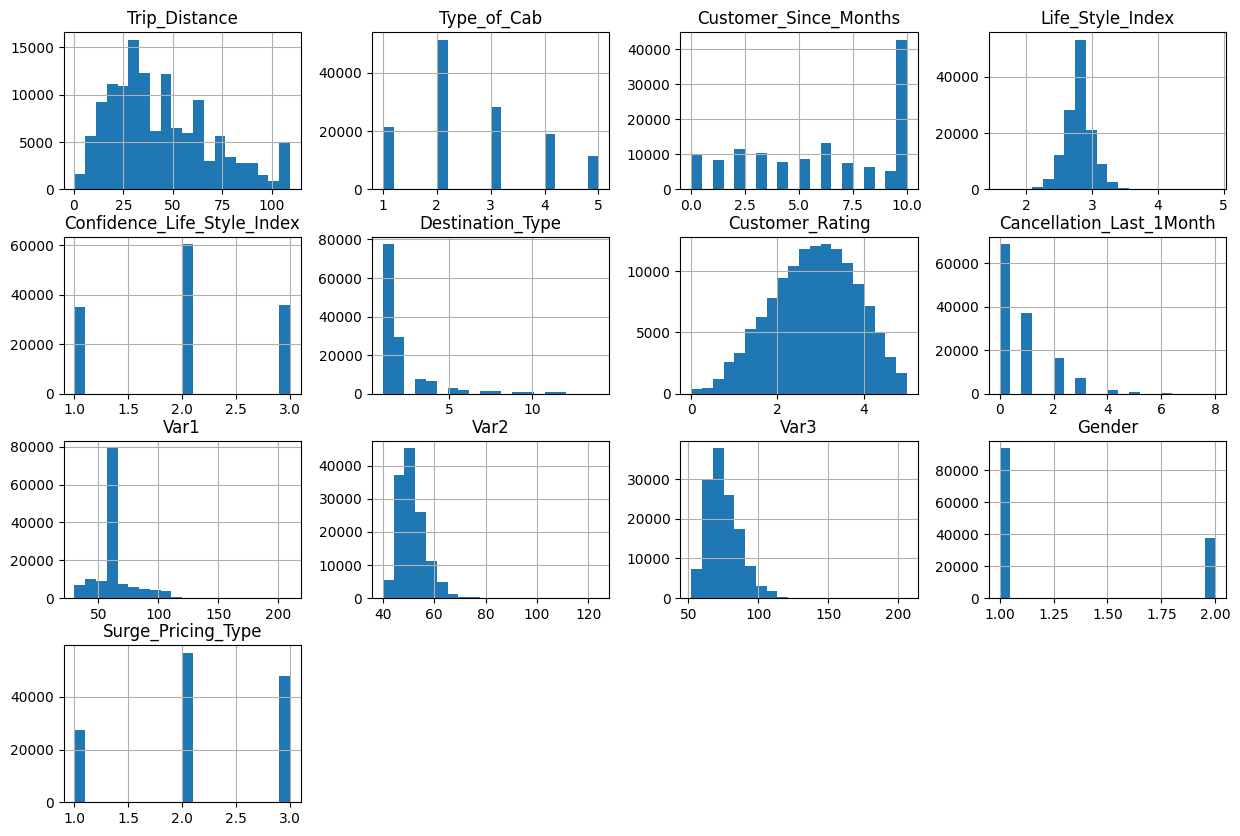

In [24]:
train.hist(bins = 20, figsize = (15, 10))

In [25]:
#sns.pairplot(train, hue = 'Surge_Pricing_Type')

# Heatmap

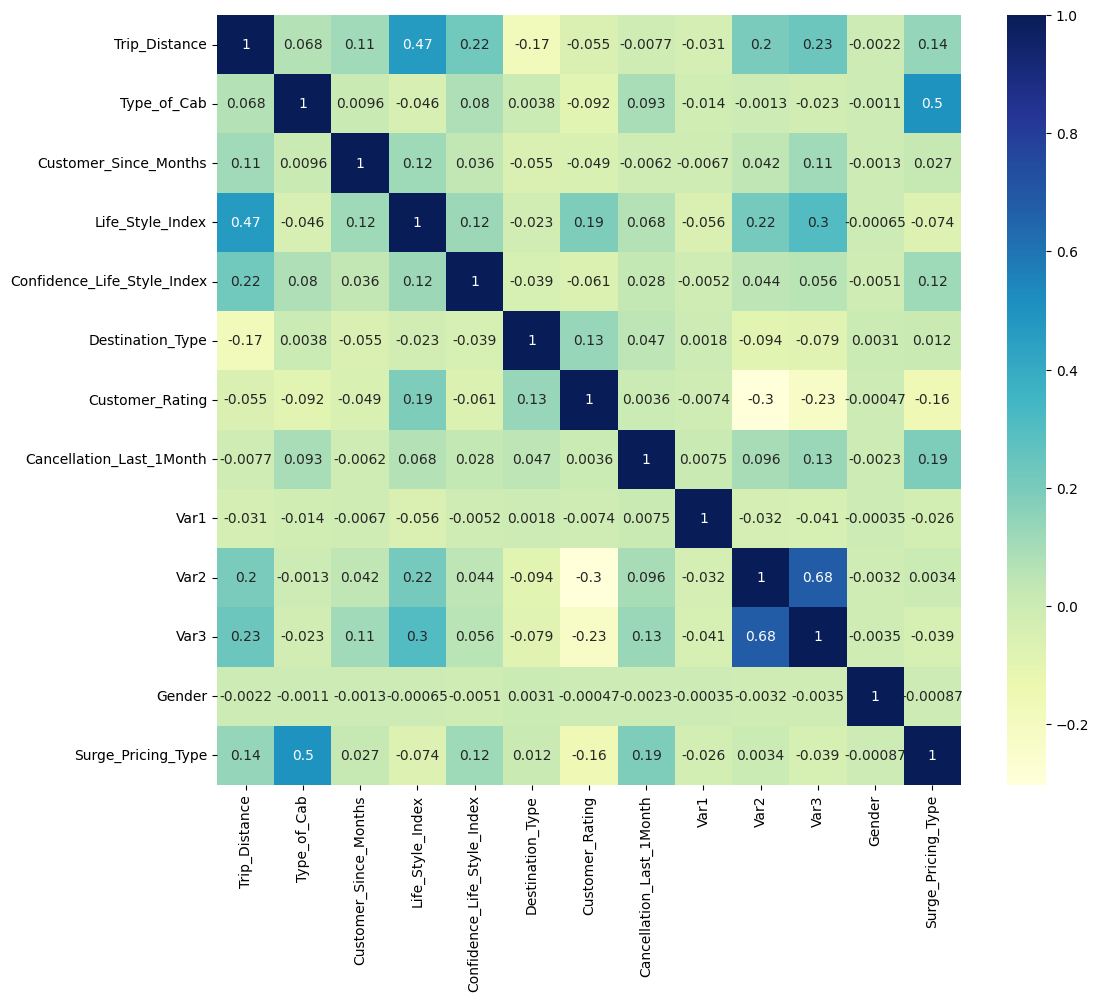

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(train.corr(), annot = True, cmap = "YlGnBu")
plt.show()

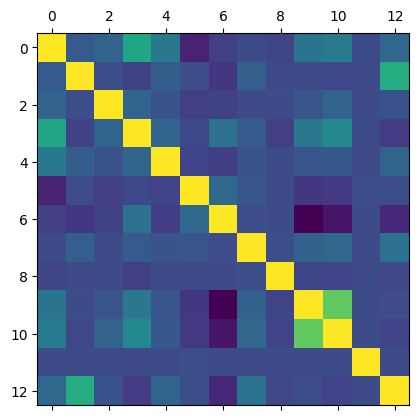

In [27]:
import matplotlib.pyplot as plt

plt.matshow(train.corr())
plt.show()

# Model Building

In [28]:
X = train.iloc[:, 0:12].values
y = train.iloc[:, 12].values

X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(105329, 12) (26333, 12) (105329,) (26333,)


In [29]:
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

Model Building

    --> Decision Tree
    --> Logistic Regression
    --> Random Forest
    --> KNN
    --> Naive Bayes
    --> XGB
    --> LGBM

## Decision Tree

In [30]:
#Decision Tree

model_tree = DecisionTreeClassifier(random_state=0)
model_tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [31]:
Y_pred1 = model_tree.predict(X_test)

print(confusion_matrix(y_test, Y_pred1))

[[2842 1714  924]
 [1769 6572 3013]
 [1033 2956 5510]]


In [32]:
print(accuracy_score(y_test, Y_pred1))

0.5667413511563437


In [33]:
print(classification_report(y_test, Y_pred1))

              precision    recall  f1-score   support

           1       0.50      0.52      0.51      5480
           2       0.58      0.58      0.58     11354
           3       0.58      0.58      0.58      9499

    accuracy                           0.57     26333
   macro avg       0.56      0.56      0.56     26333
weighted avg       0.57      0.57      0.57     26333



## Logistic Regression

In [34]:
model_linear = LogisticRegression()
model_linear.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [35]:
Y_pred2 = model_linear.predict(X_test)

print(confusion_matrix(y_test, Y_pred2))

[[2802 2237  441]
 [ 611 8335 2408]
 [ 459 3372 5668]]


In [36]:
print(accuracy_score(y_test, Y_pred2))

0.6381726350966468


In [37]:
print(classification_report(y_test, Y_pred2))

              precision    recall  f1-score   support

           1       0.72      0.51      0.60      5480
           2       0.60      0.73      0.66     11354
           3       0.67      0.60      0.63      9499

    accuracy                           0.64     26333
   macro avg       0.66      0.61      0.63     26333
weighted avg       0.65      0.64      0.64     26333



## Random Forest Classifier

In [38]:
model_random = RandomForestClassifier(random_state=0)
model_random.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [39]:
Y_pred3 = model_random.predict(X_test)

print(confusion_matrix(y_test, Y_pred3))

[[2970 1997  513]
 [ 478 9302 1574]
 [ 468 3247 5784]]


In [40]:
print(accuracy_score(y_test, Y_pred3))

0.685679565564121


In [41]:
print(classification_report(y_test, Y_pred3))

              precision    recall  f1-score   support

           1       0.76      0.54      0.63      5480
           2       0.64      0.82      0.72     11354
           3       0.73      0.61      0.67      9499

    accuracy                           0.69     26333
   macro avg       0.71      0.66      0.67     26333
weighted avg       0.70      0.69      0.68     26333



## KNN

In [42]:
model_knn = KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
model_knn.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [43]:
Y_pred4 = model_knn.predict(X_test)

print(confusion_matrix(y_test, Y_pred4))

[[3066 1794  620]
 [2095 6927 2332]
 [1280 2970 5249]]


In [44]:
print(accuracy_score(y_test, Y_pred4))

0.5788174533854858


In [45]:
print(classification_report(y_test, Y_pred4))

              precision    recall  f1-score   support

           1       0.48      0.56      0.51      5480
           2       0.59      0.61      0.60     11354
           3       0.64      0.55      0.59      9499

    accuracy                           0.58     26333
   macro avg       0.57      0.57      0.57     26333
weighted avg       0.59      0.58      0.58     26333



## Naive Bayes

In [46]:
model_nb = GaussianNB()
model_nb.fit(X_train,y_train)

,priors,None
,var_smoothing,1e-09


In [47]:
Y_pred5 = model_nb.predict(X_test)

print(confusion_matrix(y_test, Y_pred5))

[[2775 2079  626]
 [ 641 8522 2191]
 [ 451 3310 5738]]


In [48]:
print(accuracy_score(y_test, Y_pred5))

0.6469069228724414


In [49]:
print(classification_report(y_test, Y_pred5))

              precision    recall  f1-score   support

           1       0.72      0.51      0.59      5480
           2       0.61      0.75      0.67     11354
           3       0.67      0.60      0.64      9499

    accuracy                           0.65     26333
   macro avg       0.67      0.62      0.63     26333
weighted avg       0.66      0.65      0.64     26333



## XGB Boost

In [50]:
xg_reg = GradientBoostingClassifier()

In [51]:
xg_reg.fit(X_train,y_train)

Y_pred6 = xg_reg.predict(X_test)
print(confusion_matrix(y_test, Y_pred6))

[[2942 2036  502]
 [ 405 9634 1315]
 [ 496 3436 5567]]


In [52]:
print(accuracy_score(y_test, Y_pred6))

0.688983404853226


In [53]:
print(classification_report(y_test, Y_pred6))

              precision    recall  f1-score   support

           1       0.77      0.54      0.63      5480
           2       0.64      0.85      0.73     11354
           3       0.75      0.59      0.66      9499

    accuracy                           0.69     26333
   macro avg       0.72      0.66      0.67     26333
weighted avg       0.71      0.69      0.68     26333



## LGBM Classifier

In [54]:
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

d:\polytron jaya\Coding\taxi-pricing-analysis\taxi_pricing_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [55]:
Y_pred7 = clf.predict(X_test)

print(confusion_matrix(y_test, Y_pred7))

[[2972 2006  502]
 [ 427 9488 1439]
 [ 417 3277 5805]]


d:\polytron jaya\Coding\taxi-pricing-analysis\taxi_pricing_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [56]:
print(accuracy_score(y_test, Y_pred7))

0.6936163748908214


In [57]:
print(classification_report(y_test, Y_pred7))

              precision    recall  f1-score   support

           1       0.78      0.54      0.64      5480
           2       0.64      0.84      0.73     11354
           3       0.75      0.61      0.67      9499

    accuracy                           0.69     26333
   macro avg       0.72      0.66      0.68     26333
weighted avg       0.71      0.69      0.69     26333



In [58]:
result = {'Model Name':['Decision Tree', 'Logistic Regression', 'Random Forest', 'KNN', 'Naive Bayes', 'XGB', 'LGBM'],
          'Accuracy Score': [0.5667413511563437*100, 0.6380207344396764*100, 0.685679565564121*100, 0.5788174533854858*100, 0.6469069228724414*100, 0.688983404853226*100, 0.6936163748908214*100]}

In [59]:
res = pd.DataFrame.from_dict(result)
res

,Model Name,Accuracy Score
0,Decision Tree,56.674135
1,Logistic Regression,63.802073
2,Random Forest,68.567957
3,KNN,57.881745
4,Naive Bayes,64.690692
5,XGB,68.898340
6,LGBM,69.361637


# Conclusion

## Hence, LGBM gives the Highest Accuracy Score

# Hyperparameter Tuning for all Model

## 0. Logistic Regression Hyperparameter Tuning

### Step 1: Define the Parameter Grid

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid_lr = {
    'C': [0.1, 1, 10],  # Regularization strength (lower C = stronger regularization)
    'solver': ['liblinear', 'lbfgs'],  # Solvers for optimization
}

# Initialize the Logistic Regression model
model_lr = LogisticRegression()

# Perform GridSearchCV for hyperparameter tuning
grid_search_lr = GridSearchCV(model_lr, param_grid_lr, cv=5, scoring='accuracy')  # 5-fold cross-validation
grid_search_lr.fit(X_train, y_train)

# Get the best parameters and score
best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_

print("Best Parameters for Logistic Regression:", best_params_lr)
print("Best Cross-Validation Score:", best_score_lr)


d:\polytron jaya\Coding\taxi-pricing-analysis\taxi_pricing_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


d:\polytron jaya\Coding\taxi-pricing-analysis\taxi_pricing_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
d:\polytron jaya\Coding\taxi-pricing-analysis\taxi_pricing_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
d:\polytron jaya\Coding\taxi-pricing-analysis\taxi_pricing_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclas

Best Parameters for Logistic Regression: {'C': 10, 'solver': 'lbfgs'}
Best Cross-Validation Score: 0.6370325626991399


### Step 2: Fit the Model with the Best Parameters

In [75]:
# Train the Logistic Regression model with the best parameters
best_model_lr = grid_search_lr.best_estimator_
best_model_lr.fit(X_train, y_train)

# Evaluate the model
y_pred_lr = best_model_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy of Logistic Regression after tuning: {accuracy_lr}")

Accuracy of Logistic Regression after tuning: 0.6381726350966468


In [76]:
best_model_lgbm = grid_search_lgbm.best_estimator_

## 1.  Decission Tree Hyperparameter Tuning

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

model_tree = DecisionTreeClassifier(random_state=0)
grid_search_tree = GridSearchCV(model_tree, param_grid_tree, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_tree.fit(X_train, y_train)

print("Best Parameters for Decision Tree:", grid_search_tree.best_params_)
print("Best Cross-Validation Score:", grid_search_tree.best_score_)

Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Cross-Validation Score: 0.6778380255478194


## 2. Random Forest Hyperparameter Tuning with GridSeachCV

In [67]:
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

model_rf = RandomForestClassifier(random_state=0)
grid_search_rf = GridSearchCV(model_rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Cross-Validation Score:", grid_search_rf.best_score_)

Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best Cross-Validation Score: 0.6888036579800547


## 3. K-Nearest Neighbors (KNN) Hyperparameter Tuning with GridSeachCV

In [68]:
from sklearn.neighbors import KNeighborsClassifier

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

model_knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(model_knn, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

print("Best Parameters for KNN:", grid_search_knn.best_params_)
print("Best Cross-Validation Score:", grid_search_knn.best_score_)

Best Parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best Cross-Validation Score: 0.6436688887697543


## 4. Naive Bayes (GaussianNB) Hyperparameter Tuning with GridSeachCV

In [69]:
from sklearn.naive_bayes import GaussianNB

param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

model_nb = GaussianNB()
grid_search_nb = GridSearchCV(model_nb, param_grid_nb, cv=5, scoring='accuracy')
grid_search_nb.fit(X_train, y_train)

print("Best Parameters for Naive Bayes:", grid_search_nb.best_params_)
print("Best Cross-Validation Score:", grid_search_nb.best_score_)

Best Parameters for Naive Bayes: {'var_smoothing': 1e-09}
Best Cross-Validation Score: 0.6472101765817823


## 5. Gradient Boosting (Scikit-learn) Hyperparameter Tuning with GridSeachCV

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

model_gb = GradientBoostingClassifier(random_state=0)
grid_search_gb = GridSearchCV(model_gb, param_grid_gb, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_gb.fit(X_train, y_train)

print("Best Parameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best Cross-Validation Score:", grid_search_gb.best_score_)

Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50}
Best Cross-Validation Score: 0.6916423770407334


## 6. LightGBM Hyperparameter Tuning with GridSeachCV

### Step 1: Define the Parameter Grid

In [62]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

param_grid_lgbm = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

model_lgbm = lgb.LGBMClassifier(n_jobs=-1)

### Step 2: Fit the Model with the Best Parameters

In [63]:
grid_search_lgbm = GridSearchCV(model_lgbm, param_grid_lgbm, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_lgbm.fit(X_train, y_train)

best_params_lgbm = grid_search_lgbm.best_params_
best_score_lgbm = grid_search_lgbm.best_score_

print("Best Parameters for LightGBM:", best_params_lgbm)
print("Best Cross-Validation Score:", best_score_lgbm)

d:\polytron jaya\Coding\taxi-pricing-analysis\taxi_pricing_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Best Parameters for LightGBM: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 50}
Best Cross-Validation Score: 0.6928006451483654


# K-Fold Cross Validation

## Getting The K-Fold Cross Validation Score

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, KFold
import lightgbm as lgb
import numpy as np

# Ganti parameter di bawah ini dengan hasil tuning GridSearchCV Anda
best_model_lr = LogisticRegression(C=1, solver='liblinear')  # Contoh, sesuaikan dengan hasil GridSearchCV
best_model_rf = RandomForestClassifier(
    n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=0
)  # Contoh, sesuaikan dengan hasil GridSearchCV
best_model_knn = KNeighborsClassifier(
    n_neighbors=5, weights='uniform', metric='minkowski'
)  # Contoh, sesuaikan dengan hasil GridSearchCV
best_model_nb = GaussianNB(var_smoothing=1e-9)  # Contoh, sesuaikan dengan hasil GridSearchCV
best_model_lgb = lgb.LGBMClassifier(
    n_estimators=100, learning_rate=0.1, max_depth=5
)  # Contoh, sesuaikan dengan hasil GridSearchCV

# KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Logistic Regression Cross-Validation
cv_scores_lr = cross_val_score(best_model_lr, X_train, y_train, cv=kf, scoring='accuracy')
print(f"Logistic Regression Cross-Validation Scores: {cv_scores_lr}")
print(f"Mean CV Score for Logistic Regression: {np.mean(cv_scores_lr)}")

# Random Forest Cross-Validation
cv_scores_rf = cross_val_score(best_model_rf, X_train, y_train, cv=kf, scoring='accuracy')
print(f"Random Forest Cross-Validation Scores: {cv_scores_rf}")
print(f"Mean CV Score for Random Forest: {np.mean(cv_scores_rf)}")

# KNN Cross-Validation
cv_scores_knn = cross_val_score(best_model_knn, X_train, y_train, cv=kf, scoring='accuracy')
print(f"KNN Cross-Validation Scores: {cv_scores_knn}")
print(f"Mean CV Score for KNN: {np.mean(cv_scores_knn)}")

# Naive Bayes Cross-Validation
cv_scores_nb = cross_val_score(best_model_nb, X_train, y_train, cv=kf, scoring='accuracy')
print(f"Naive Bayes Cross-Validation Scores: {cv_scores_nb}")
print(f"Mean CV Score for Naive Bayes: {np.mean(cv_scores_nb)}")

from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Pastikan best_model_lgbm sudah didapat dari GridSearchCV seperti di atas
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# LightGBM Cross-Validation
cv_scores_lgbm = cross_val_score(best_model_lgbm, X_train, y_train, cv=kf, scoring='accuracy')
print(f"LightGBM Cross-Validation Scores: {cv_scores_lgbm}")
print(f"Mean CV Score for LightGBM: {np.mean(cv_scores_lgbm)}")


d:\polytron jaya\Coding\taxi-pricing-analysis\taxi_pricing_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
d:\polytron jaya\Coding\taxi-pricing-analysis\taxi_pricing_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
d:\polytron jaya\Coding\taxi-pricing-analysis\taxi_pricing_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclas

Logistic Regression Cross-Validation Scores: [0.63144403 0.622045   0.6250356  0.62788379 0.62549252]
Mean CV Score for Logistic Regression: 0.6263801907578386
Random Forest Cross-Validation Scores: [0.68698377 0.68385075 0.68081268 0.68817051 0.68943746]
Mean CV Score for Random Forest: 0.685851034249079
KNN Cross-Validation Scores: [0.60927561 0.60476597 0.60562043 0.6081838  0.6156658 ]
Mean CV Score for KNN: 0.6087023228500554
Naive Bayes Cross-Validation Scores: [0.64748884 0.64525776 0.6433115  0.65128643 0.64994066]
Mean CV Score for Naive Bayes: 0.6474570392163663


d:\polytron jaya\Coding\taxi-pricing-analysis\taxi_pricing_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\polytron jaya\Coding\taxi-pricing-analysis\taxi_pricing_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\polytron jaya\Coding\taxi-pricing-analysis\taxi_pricing_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\polytron jaya\Coding\taxi-pricing-analysis\taxi_pricing_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\polytron jaya\Coding\taxi-pricing-analysis\taxi_prici

LightGBM Cross-Validation Scores: [0.6933922  0.68954714 0.69011678 0.69324979 0.69594113]
Mean CV Score for LightGBM: 0.6924494060679255


d:\polytron jaya\Coding\taxi-pricing-analysis\taxi_pricing_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


## Making Tabel for the Score

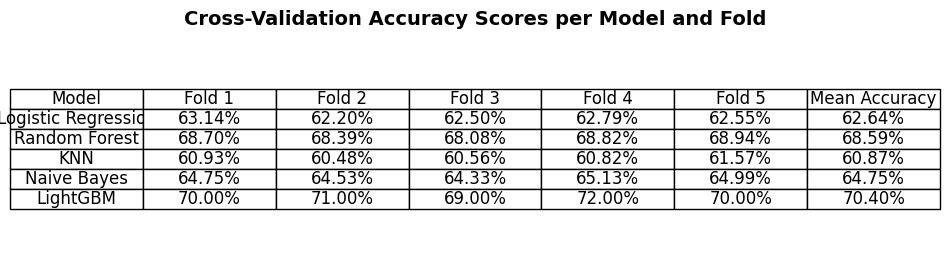

In [79]:
# Data hasil cross-validation (ganti sesuai hasil Anda jika berbeda)
data = {
    'Model': ['Logistic Regression', 'Random Forest', 'KNN', 'Naive Bayes', 'LightGBM'],
    'Fold 1': [0.6314, 0.6870, 0.6093, 0.6475, 0.7000],
    'Fold 2': [0.6220, 0.6839, 0.6048, 0.6453, 0.7100],
    'Fold 3': [0.6250, 0.6808, 0.6056, 0.6433, 0.6900],
    'Fold 4': [0.6279, 0.6882, 0.6082, 0.6513, 0.7200],
    'Fold 5': [0.6255, 0.6894, 0.6157, 0.6499, 0.7000],
}

# Membuat DataFrame
cv_df = pd.DataFrame(data)

# Hitung mean accuracy
cv_df['Mean Accuracy'] = cv_df.loc[:, 'Fold 1':'Fold 5'].mean(axis=1)

# Format persentase
cv_df_formatted = cv_df.copy()
for col in cv_df.columns[1:]:
    cv_df_formatted[col] = (cv_df_formatted[col] * 100).map('{:.2f}%'.format)

# Visualisasi tabel menggunakan matplotlib
fig, ax = plt.subplots(figsize=(10, 3))
ax.axis('tight')
ax.axis('off')

# Buat tabel
table = ax.table(cellText=cv_df_formatted.values,
                 colLabels=cv_df_formatted.columns,
                 cellLoc='center',
                 loc='center')

# Styling tabel
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

plt.title('Cross-Validation Accuracy Scores per Model and Fold', fontsize=14, fontweight='bold')
plt.show()


# Prepare for Streamlit Deploy

In [84]:
X = train.iloc[:, 0:12].values

In [85]:
feature_names = train.columns[:12].tolist()

In [86]:
import os
import joblib

# Pastikan folder sudah ada
os.makedirs(r'D:\polytron jaya\Coding\taxi-pricing-analysis\Model for Streamlit', exist_ok=True)

# Simpan model hasil tuning
joblib.dump(best_model_lgbm, r'D:\polytron jaya\Coding\taxi-pricing-analysis\Model for Streamlit\lgbm_model.pkl')

# Simpan scaler (gunakan sc_X, bukan scaler)
joblib.dump(sc_X, r'D:\polytron jaya\Coding\taxi-pricing-analysis\Model for Streamlit\scaler_lgbm.pkl')

# Simpan feature names
feature_names = train.columns[:12].tolist()
joblib.dump(feature_names, r'D:\polytron jaya\Coding\taxi-pricing-analysis\Model for Streamlit\feature_names_lgbm.pkl')

['D:\\polytron jaya\\Coding\\taxi-pricing-analysis\\Model for Streamlit\\feature_names_lgbm.pkl']

In [87]:
from sklearn.preprocessing import LabelEncoder

cab_encoder = LabelEncoder()
train['Type_of_Cab'] = cab_encoder.fit_transform(train['Type_of_Cab'])
joblib.dump(cab_encoder, r'D:\polytron jaya\Coding\taxi-pricing-analysis\Model for Streamlit/cab_encoder.pkl')

['D:\\polytron jaya\\Coding\\taxi-pricing-analysis\\Model for Streamlit/cab_encoder.pkl']

In [89]:
# Encoder untuk Destination_Type
dest_encoder = LabelEncoder()
train['Destination_Type'] = dest_encoder.fit_transform(train['Destination_Type'])
joblib.dump(dest_encoder, r'D:\polytron jaya\Coding\taxi-pricing-analysis\Model for Streamlit/dest_encoder.pkl')

# Encoder untuk Confidence_Life_Style_Index
conf_encoder = LabelEncoder()
train['Confidence_Life_Style_Index'] = conf_encoder.fit_transform(train['Confidence_Life_Style_Index'])
joblib.dump(conf_encoder, r'D:\polytron jaya\Coding\taxi-pricing-analysis\Model for Streamlit/conf_encoder.pkl')

['D:\\polytron jaya\\Coding\\taxi-pricing-analysis\\Model for Streamlit/conf_encoder.pkl']

In [91]:
# Training
cab_type_dict = {'Economy (Micro)': 0, 'Standard (Mini)': 1, 'Premium (Prime)': 2}
# Simpan dictionary ini dengan joblib
joblib.dump(cab_type_dict, r'D:\polytron jaya\Coding\taxi-pricing-analysis\Model for Streamlit/cab_type_dict.pkl')

['D:\\polytron jaya\\Coding\\taxi-pricing-analysis\\Model for Streamlit/cab_type_dict.pkl']

In [92]:
from sklearn.preprocessing import LabelEncoder
gender_encoder = LabelEncoder()
train['Gender'] = gender_encoder.fit_transform(train['Gender'])
joblib.dump(gender_encoder, r'D:\polytron jaya\Coding\taxi-pricing-analysis\Model for Streamlit/gender_encoder.pkl')

['D:\\polytron jaya\\Coding\\taxi-pricing-analysis\\Model for Streamlit/gender_encoder.pkl']

In [93]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Vehicle Type
cab_categories = ["Economy", "Comfy", "Exclusive"]
cab_encoder = LabelEncoder()
cab_encoder.fit(cab_categories)
joblib.dump(cab_encoder, r'D:\polytron jaya\Coding\taxi-pricing-analysis\Model for Streamlit/cab_encoder.pkl')

# Service Confidence
conf_categories = ["High Confidence", "Medium Confidence", "Low Confidence"]
conf_encoder = LabelEncoder()
conf_encoder.fit(conf_categories)
joblib.dump(conf_encoder, r'D:\polytron jaya\Coding\taxi-pricing-analysis\Model for Streamlit/conf_encoder.pkl')

# Destination
dest_categories = ["Airport", "City Center", "Mall", "University"]
dest_encoder = LabelEncoder()
dest_encoder.fit(dest_categories)
joblib.dump(dest_encoder, r'D:\polytron jaya\Coding\taxi-pricing-analysis\Model for Streamlit/dest_encoder.pkl')

# Gender
gender_categories = ["Male", "Female", "Other"]
gender_encoder = LabelEncoder()
gender_encoder.fit(gender_categories)
joblib.dump(gender_encoder, r'D:\polytron jaya\Coding\taxi-pricing-analysis\Model for Streamlit/gender_encoder.pkl')


['D:\\polytron jaya\\Coding\\taxi-pricing-analysis\\Model for Streamlit/gender_encoder.pkl']

## 4. Support Vector Machine (SVM) Hyperparameter Tuning

### Step 2: Skalakan Data (X_train dan X_test) menggunakan StandardScaler

In [ ]:
import pickle
# Step 2: Skalakan Data (X_train dan X_test) menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit pada data training
X_test_scaled = scaler.transform(X_test)  # Transformasi data test

# Simpan scaler ke file scaler_svm.pkl
with open(r'D:\polytron jaya\Coding\taxi-pricing-analysis\Model for Streamlit/scaler_svm.pkl', 'wb') as f:
    pickle.dump(scaler, f)

NameError: name 'StandardScaler' is not defined